# Download and Install CLIP Dependencies

In [ ]:
# installing some dependencies, CLIP was released in PyTorch
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

import numpy as np
import torch
import os

print("Torch version:", torch.__version__)
os.kill(os.getpid(), 9)

CUDA version: 11.1
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.7 MB/s eta 0:03:06tcmalloc: large alloc 1147494400 bytes == 0x3aa70000 @  0x7f7afa189615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████████████▏  | 1055.7 MB 1.4 MB/s eta 0:01:11tcmalloc: large alloc 1434370048 bytes == 0x7f0c6000 @  0x7f7afa189615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 1156.7 MB 1.3 MB/s eta 0:00:01tcmalloc: large alloc

In [1]:
#clone the CLIP repository
!git clone https://github.com/openai/CLIP.git
%cd CLIP

Cloning into 'CLIP'...
remote: Enumerating objects: 222, done.
remote: Total 222 (delta 0), reused 0 (delta 0), pack-reused 222
Receiving objects: 100% (222/222), 8.92 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (111/111), done.
/content/CLIP


# Downloading the clip model and our Data
Here we will be downloading the clip model that we will use on the dataset we created on Roboflow.

In [2]:
# download clip model
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="clip", notebook="roboflow-clip")

     |████████████████████████████████| 145 kB 5.3 MB/s 
     |████████████████████████████████| 178 kB 41.6 MB/s 
     |████████████████████████████████| 1.1 MB 40.6 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 138 kB 41.6 MB/s 
     |████████████████████████████████| 596 kB 32.7 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.7.1+cu110 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 whic

In [112]:
# download classification data
rf = Roboflow(api_key="jyWhsscgsT3D1GKlldiT")
project = rf.workspace("project-vkjtv").project("pictures-classification")
dataset = project.version(2).download("clip")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Pictures-classification-2 in clip:: 100%|██████████| 1119/1119 [00:01<00:00, 889.94it/s] 


In [113]:
dataset.location

'/content/CLIP/Pictures-classification-2'

In [114]:
import os
# our the classes and images we want to test are stored in folders in the test set
class_names = os.listdir(dataset.location + '/test/')
class_names.remove('_tokenization.txt')
class_names
# Here we have two classes

['Professional picture', 'None Professional picture']

In [115]:
# Some example tokenizations in Roboflow but you should edit this file to try out your own prompts
# CLIP gets a lot better with the right prompting!
# be sure the tokenizations are in the same order as your class_names above!
%cat {dataset.location}/test/_tokenization.txt

An example picture from the Pictures classification dataset depicting a None Professional picture
An example picture from the Pictures classification dataset depicting a Professional picture

In [131]:
# editing our prompts to try to get the best acuuracy, be sure the classes are in the same order as above
%%writefile {dataset.location}/test/_tokenization.txt
A smiling face indoor professional picture
Not a smiling face outdoor none professional picture

Overwriting /content/CLIP/Pictures-classification-2/test/_tokenization.txt


In [132]:
candidate_captions = []
with open(dataset.location + '/test/_tokenization.txt') as f:
    candidate_captions = f.read().splitlines()

In [133]:
candidate_captions

['A smiling face indoor professional picture',
 'Not a smiling face outdoor none professional picture']

## Runing CLIP inference on our classification dataset

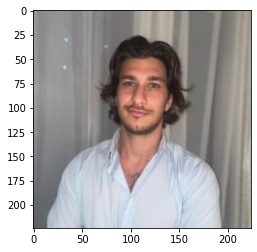

prediction is :Professional picture
reality is :Professional picture


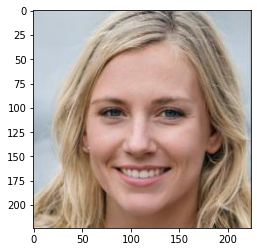

prediction is :Professional picture
reality is :Professional picture


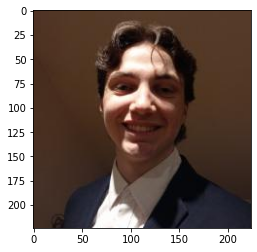

prediction is :Professional picture
reality is :Professional picture


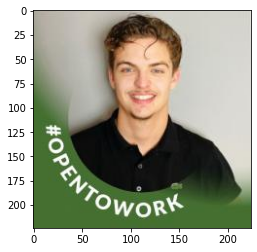

prediction is :Professional picture
reality is :Professional picture


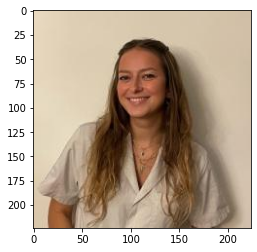

prediction is :Professional picture
reality is :Professional picture


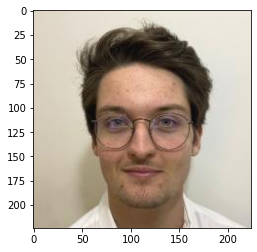

prediction is :Professional picture
reality is :Professional picture


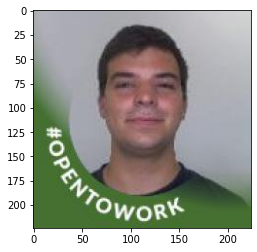

prediction is :None Professional picture
reality is :Professional picture


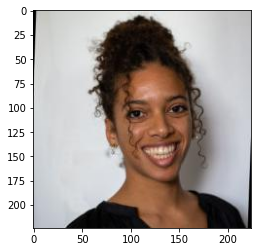

prediction is :Professional picture
reality is :Professional picture


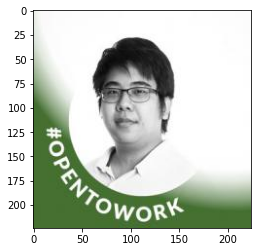

prediction is :None Professional picture
reality is :Professional picture


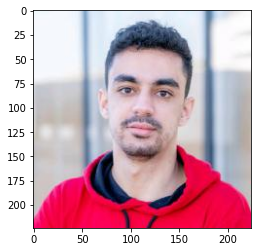

prediction is :Professional picture
reality is :Professional picture


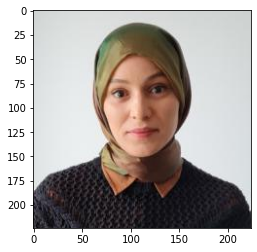

prediction is :None Professional picture
reality is :Professional picture


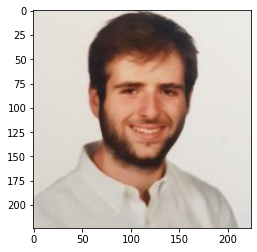

prediction is :Professional picture
reality is :Professional picture


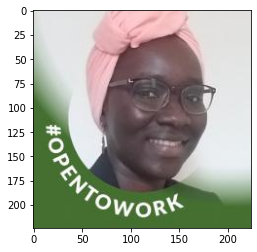

prediction is :None Professional picture
reality is :Professional picture


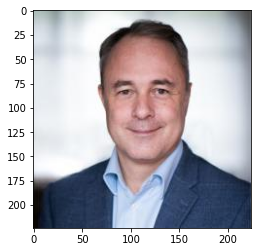

prediction is :Professional picture
reality is :Professional picture


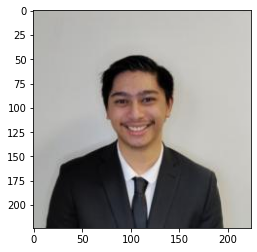

prediction is :Professional picture
reality is :Professional picture


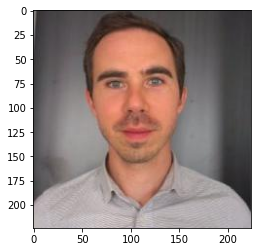

prediction is :Professional picture
reality is :Professional picture


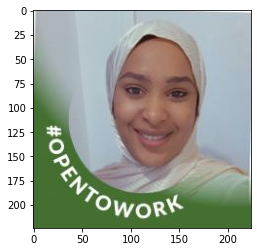

prediction is :None Professional picture
reality is :Professional picture


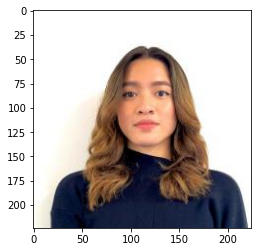

prediction is :Professional picture
reality is :Professional picture


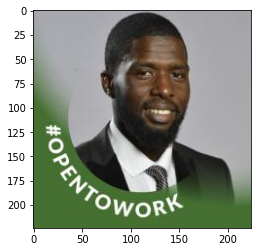

prediction is :None Professional picture
reality is :Professional picture


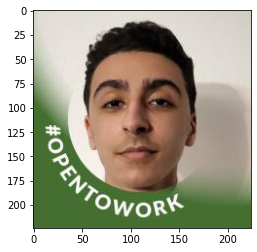

prediction is :None Professional picture
reality is :Professional picture


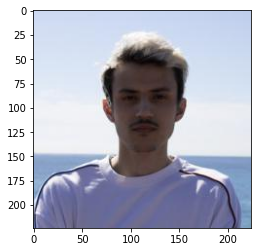

prediction is :None Professional picture
reality is :Professional picture


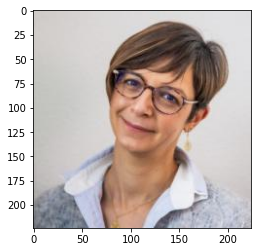

prediction is :Professional picture
reality is :Professional picture


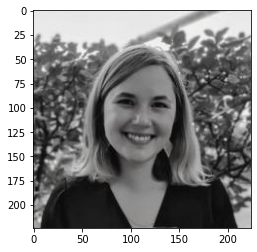

prediction is :Professional picture
reality is :Professional picture


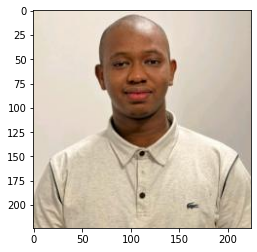

prediction is :Professional picture
reality is :Professional picture


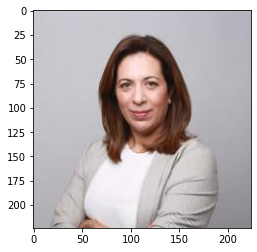

prediction is :Professional picture
reality is :Professional picture


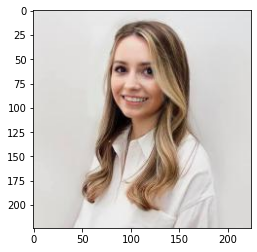

prediction is :Professional picture
reality is :Professional picture


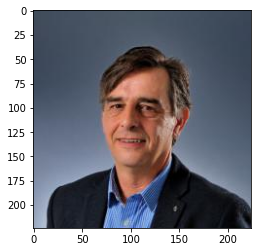

prediction is :Professional picture
reality is :Professional picture


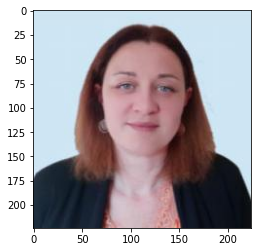

prediction is :Professional picture
reality is :Professional picture


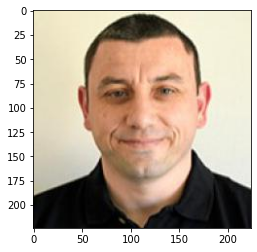

prediction is :Professional picture
reality is :Professional picture


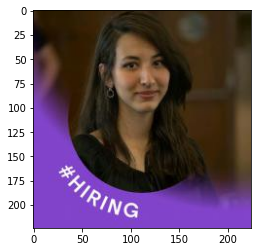

prediction is :Professional picture
reality is :Professional picture


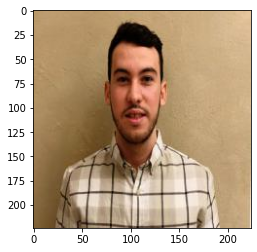

prediction is :Professional picture
reality is :Professional picture


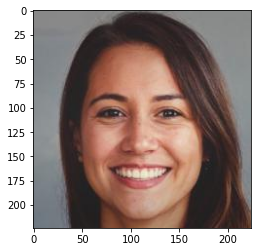

prediction is :Professional picture
reality is :Professional picture


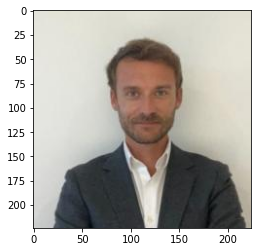

prediction is :Professional picture
reality is :Professional picture


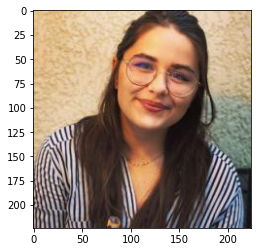

prediction is :Professional picture
reality is :Professional picture


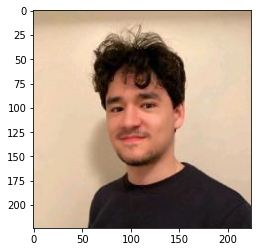

prediction is :Professional picture
reality is :Professional picture


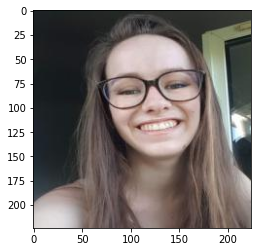

prediction is :Professional picture
reality is :Professional picture


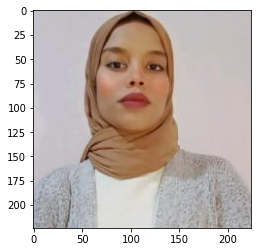

prediction is :None Professional picture
reality is :Professional picture


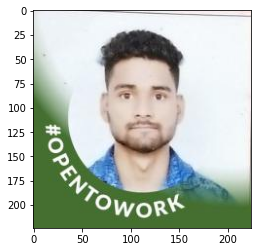

prediction is :None Professional picture
reality is :Professional picture


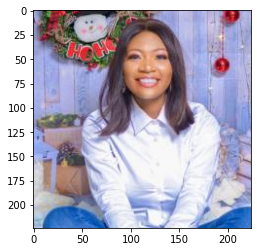

prediction is :Professional picture
reality is :Professional picture


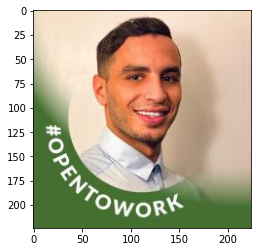

prediction is :None Professional picture
reality is :Professional picture


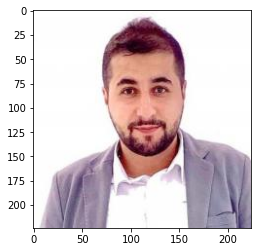

prediction is :Professional picture
reality is :Professional picture
accuracy on class Professional picture is :0.7317073170731707


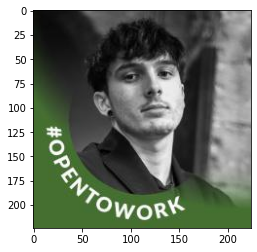

prediction is :None Professional picture
reality is :None Professional picture


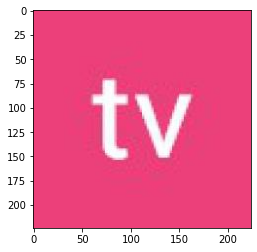

prediction is :None Professional picture
reality is :None Professional picture


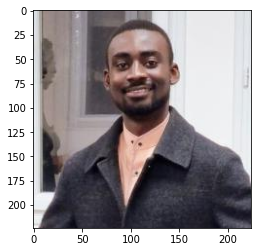

prediction is :Professional picture
reality is :None Professional picture


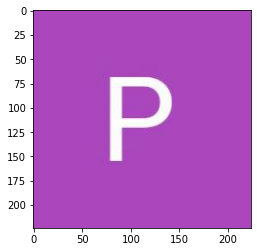

prediction is :None Professional picture
reality is :None Professional picture


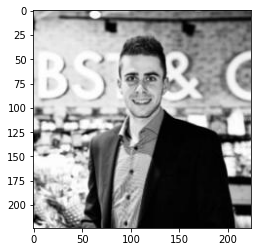

prediction is :Professional picture
reality is :None Professional picture


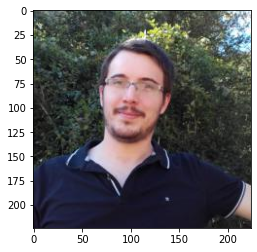

prediction is :None Professional picture
reality is :None Professional picture


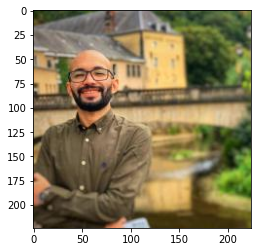

prediction is :None Professional picture
reality is :None Professional picture


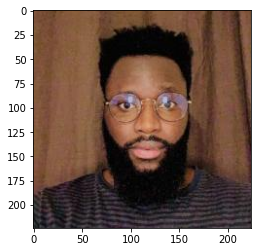

prediction is :None Professional picture
reality is :None Professional picture


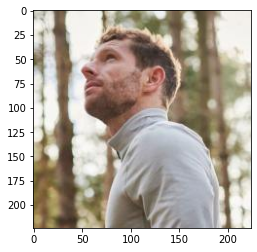

prediction is :None Professional picture
reality is :None Professional picture


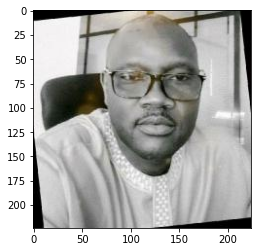

prediction is :None Professional picture
reality is :None Professional picture


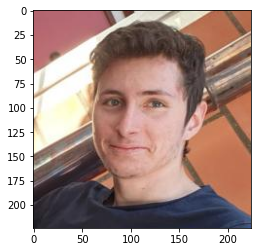

prediction is :Professional picture
reality is :None Professional picture


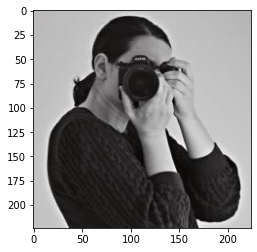

prediction is :Professional picture
reality is :None Professional picture


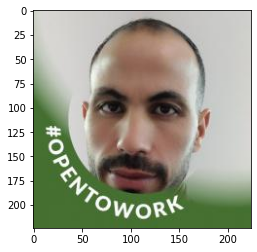

prediction is :None Professional picture
reality is :None Professional picture


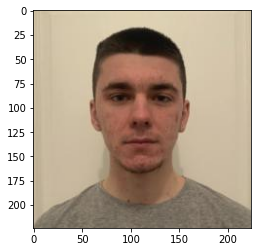

prediction is :None Professional picture
reality is :None Professional picture


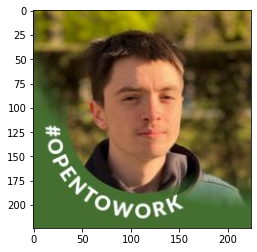

prediction is :None Professional picture
reality is :None Professional picture


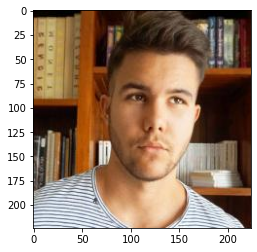

prediction is :None Professional picture
reality is :None Professional picture


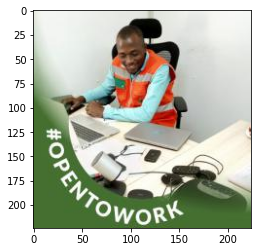

prediction is :Professional picture
reality is :None Professional picture


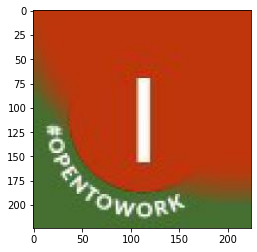

prediction is :None Professional picture
reality is :None Professional picture


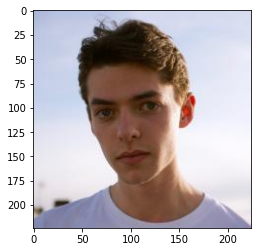

prediction is :None Professional picture
reality is :None Professional picture


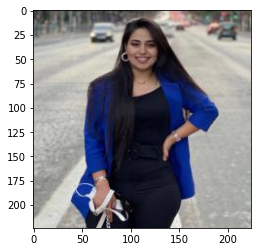

prediction is :None Professional picture
reality is :None Professional picture


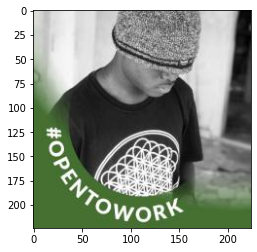

prediction is :None Professional picture
reality is :None Professional picture


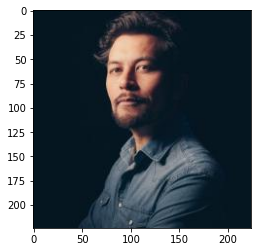

prediction is :Professional picture
reality is :None Professional picture


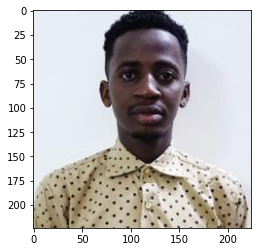

prediction is :None Professional picture
reality is :None Professional picture


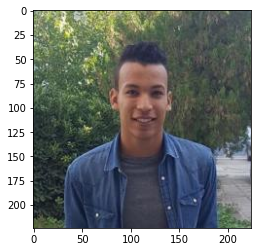

prediction is :None Professional picture
reality is :None Professional picture


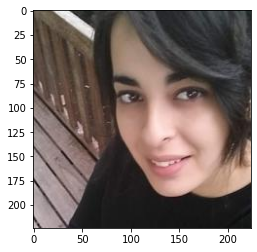

prediction is :None Professional picture
reality is :None Professional picture


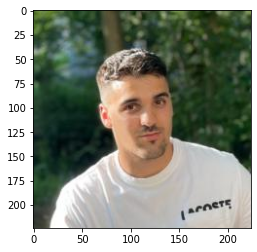

prediction is :None Professional picture
reality is :None Professional picture


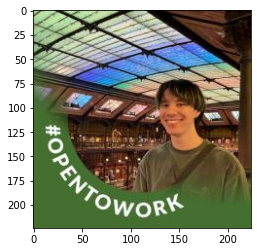

prediction is :Professional picture
reality is :None Professional picture
accuracy on class None Professional picture is :0.7407407407407407
accuracy on class Professional picture is :0.7317073170731707
accuracy on all is : 0.7352941176470589


In [150]:
import torch
import clip
import glob
from matplotlib import pyplot as plt
from PIL import Image as img
import cv2

DATADIR = "/content/CLIP/Pictures-classification-2/test"
CATEGORIES = ["None Professional picture", "Professional picture"]

def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)

correct = []
prediction = []
reality = []

#define our target classificaitons, you can should experiment with these strings of text as you see fit, though, make sure they are in the same order as your class names above
text = clip.tokenize(candidate_captions).to(device)

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)

for cls in class_names:
    class_correct = []
    test_imgs = glob.glob(dataset.location + '/test/' + cls + '/*.jpg')
    for img in test_imgs:
        # print(img)
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()

        image = transform(Image.open(img)).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            
            logits_per_image, logits_per_text = model(image, text)
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()

            pred = class_names[argmax(list(probs)[0])]
            # print(pred)
            prediction.append(pred)
            print('prediction is :' + pred)
            reality.append(cls)
            print('reality is :' + cls)
            if pred == cls:
                correct.append(1)
                class_correct.append(1)
            else:
                correct.append(0)
                class_correct.append(0)
    
    print('accuracy on class ' + cls + ' is :' + str(sum(class_correct)/len(class_correct)))
    if cls == "Professional picture":
      Professional_accuracy = str(sum(class_correct)/len(class_correct))
print('accuracy on class Professional picture is :' + Professional_accuracy)
print('accuracy on all is : ' + str(sum(correct)/len(correct)))

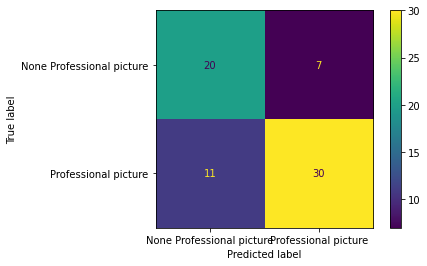

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(reality, prediction)